In [112]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
import numpy as np
import random
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_blobs

In [66]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


In [67]:
def plot_Points(X, y):
    plt.scatter(X, y)
    plt.xlabel('no. rooms')
    plt.ylabel('price')

In [68]:
def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

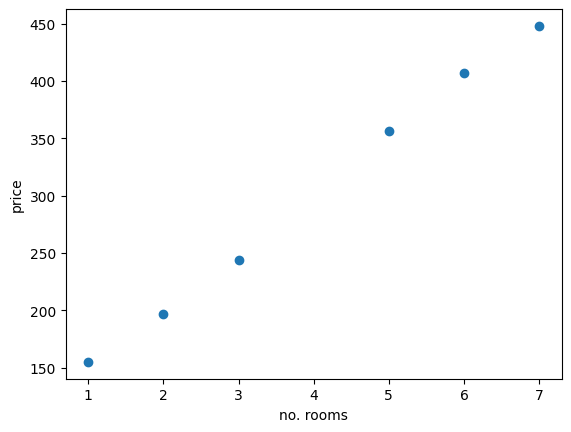

In [69]:
plot_Points(features, labels)

In [70]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    '''
    inputs:
        (price_per_room, base_price): size of (W, b) is (1, 1) respectevly, only takes one dimension W
        learning_rate:  small incremental on the rotation of the line, small (x10-5) to avoid overshooting, altough this wont overshoot as is a simple model with 1 W dim
        (num_rooms, price): (features, labes) respectevly of the random point choose in the lnear_regression func.
    
    transformation:
        price_per_room = 

    output:
        (W, b) modified at the specific point
    '''
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

In [71]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    '''
    inputs:
        (price_per_room, base_price): size of (W, b) is (1, 1) respectevly, only takes one dimension W
        learning_rate:  small incremental on the rotation of the line, small (x10-5) to avoid overshooting, altough this wont overshoot as is a simple model with 1 W dim
        (num_rooms, price): (features, labes) respectevly of the random point choose in the lnear_regression func.

    transformation:
        if the point is above the line:
            rotate counterclockwise and translate up
        else:
            rotate clockwise and translate down
    
    output:
        (W, b) modified at the specific point to be closer
    '''
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

1 155
Price per room: 51.04430678220095
Base price: 91.59448307644864


(np.float64(51.04430678220095), np.float64(91.59448307644864))

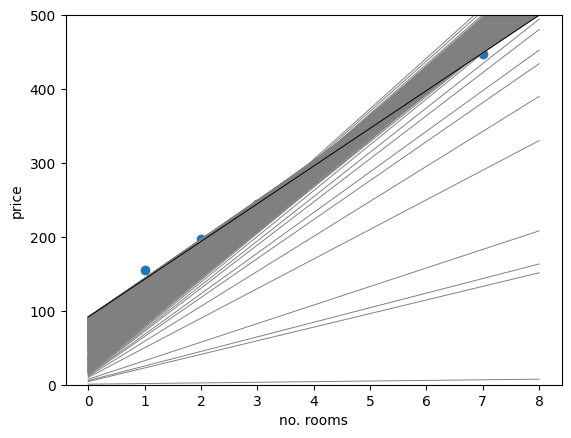

In [72]:
import random

random.seed(0)

def linear_regression(features, labels, learning_rate=0.0001, epochs = 1000):
    '''
    input:
        start(price_per_room, base_price): rand int (seed 0)
        idx i: choosen randomly between all posisble points in my train_set, modify the line according according to all points to minimize loss
        epochs: no. iterations

    output:
        (W, b) of the final model
    '''
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        draw_line(price_per_room, base_price)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        if epoch == 1:
            print(num_rooms, price)
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    plot_Points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

In [73]:
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

Price per room: 50.65781332767556
Base price: 99.79504258184782


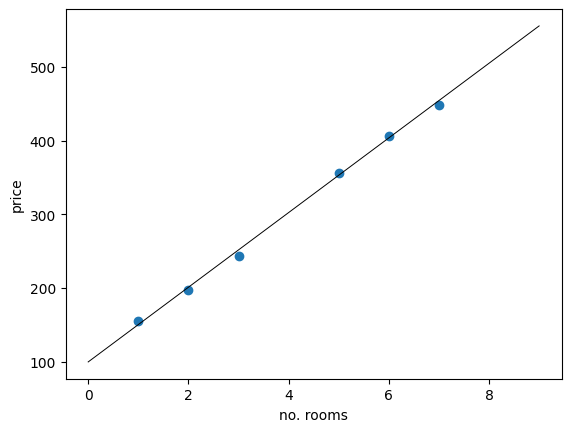

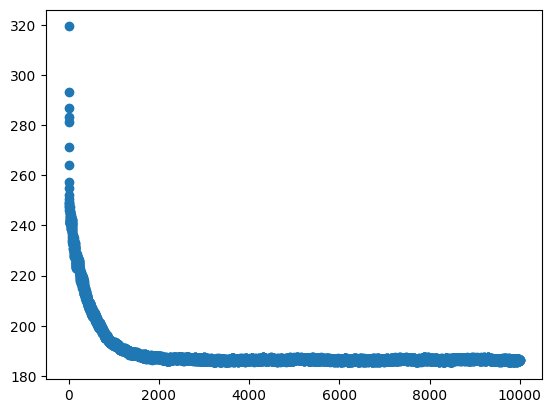

(np.float64(50.65781332767556), np.float64(99.79504258184782))

In [74]:

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    plot_Points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

Polynomial Regression

In [75]:
x = np.linspace(-5, 5, 100)

coefficients = [2, -4, 1]  
y = np.polyval(coefficients, x)

noise = np.random.normal(0, 10, size=y.shape)
y = y + noise

In [76]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

In [77]:
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)


In [78]:
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

for degree in range(1,11):
    
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
degrees=range(1,11)

In [79]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


In [80]:
X_test_mapped = polys[degree-1].transform(x_test)

X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 38.77
Cross Validation MSE: 54.45
Test MSE: 51.44


With NN's

In [81]:
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [82]:
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

In [129]:
models = []

tf.random.set_seed(20)

model_1 = Sequential(
    [
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='linear')
    ],
    name = 'model1'
)

model_2 = Sequential(
    [
    Dense(20, activation='relu'),
    Dense(12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='linear')
    ],
    name = 'model2'
)

model_3 = Sequential(
    [
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='linear')
    ],
    name = 'model3'
)

models.append(model_1)
models.append(model_2)
models.append(model_3)


In [84]:
nn_train_mses = []
nn_cv_mses = []


for model in models:
    
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(model.name)
    
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    
    
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)
    
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

model1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
RESULTS:
Model 1: Training MSE: 36.63, CV MSE: 77.04
Model 2: Training MSE: 28.91, CV MSE: 70.23
Model 3: Training MSE: 27.90, CV MSE: 97.48


In [120]:
model_num = 2

yhat = models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Selected Model: 2
Training MSE: 28.91
Cross Validation MSE: 70.23
Test MSE: 52.07


In [130]:
classes = 2
m = 200
centers = [[-5, 2], [-2, -2]]
std = 1.0
x_bc, y_bc = make_blobs(n_samples=m, centers=centers,random_state=30)

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

the shape of the inputs x is: (200, 2)
the shape of the targets y is: (200, 1)


In [131]:
def plot_bc_dataset(x, y, title):
    for i in range(len(y)):
        marker = 'x' if y[i] == 1 else 'o'
        c = 'r' if y[i] == 1 else 'b'
        plt.scatter(x[i,0], x[i,1], marker=marker, c=c); 
    plt.title("x1 vs x2")
    plt.xlabel("x1"); 
    plt.ylabel("x2"); 
    y_0 = mlines.Line2D([], [], color='r', marker='x', markersize=12, linestyle='None', label='y=1')
    y_1 = mlines.Line2D([], [], color='b', marker='o', markersize=12, linestyle='None', label='y=0')
    plt.title(title)
    plt.legend(handles=[y_0, y_1])
    plt.show()

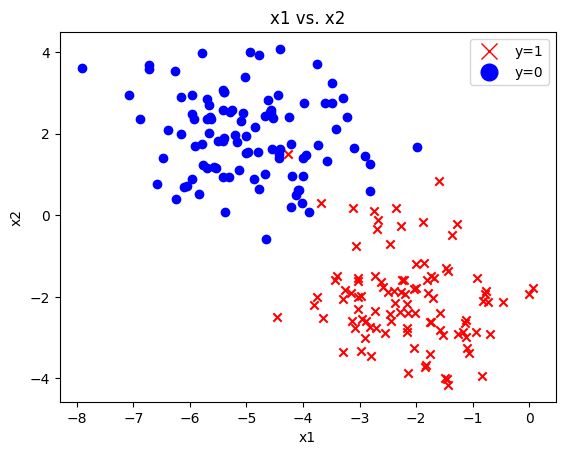

In [132]:
plot_bc_dataset(x=x_bc, y=y_bc, title="x1 vs. x2")

In [133]:
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [134]:
scaler_linear = StandardScaler()

x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

In [135]:
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])
predictions = np.where(probabilities >= 0.5, 1, 0)

ground_truth = np.array([1, 1, 1, 1, 1])
misclassified = 0

num_predictions = len(predictions)

for i in range(num_predictions):

    if predictions[i] != ground_truth[i]:
        misclassified += 1

fraction_error = misclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


In [136]:
nn_train_error = []
nn_cv_error = []

for model in models:
    
    model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}...")

    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )
    
    print("Done!\n")
    
    threshold = 0.5
    
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training model1...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Training model2...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Training model3...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model 1: Training Set Classification Error: 0.00000, CV Set Classification Error: 0.02500
Model 2: Training Set Classification Error: 0.00000, CV Set Classification Error: 0.02500
Model 3: Training Set Classification Error: 0.00000, CV Set Classification Error: 0.02500


In [137]:
model_num = 3

yhat = models[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Selected Model: 3
Training Set Classification Error: 0.0000
CV Set Classification Error: 0.0250
Test Set Classification Error: 0.0250
